In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 


In [2]:
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
correlation=gold_data.corr()

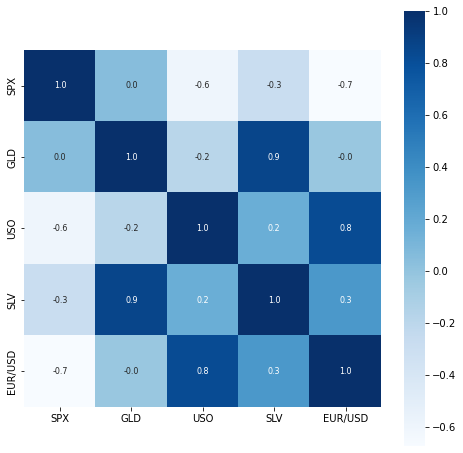

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [14]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


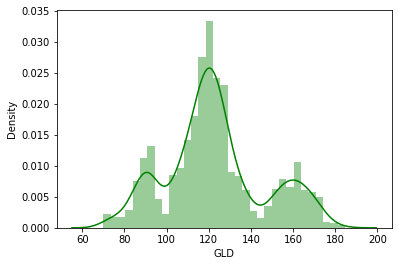

In [15]:
sns.distplot(gold_data['GLD'],color='green')

In [16]:
#splitting the dataset in features and labels
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [17]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [18]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [19]:
#splitting the data in train data and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [20]:
#model training using Random regressor
regressor=RandomForestRegressor(n_estimators=100)

In [21]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [22]:
#model evaluation
#prediction on test data
test_data_pred=regressor.predict(X_test)


In [23]:
print(test_data_pred)

[168.45279926  81.91620005 115.96320019 127.63010082 120.47490104
 154.74099744 150.22639839 126.10010031 117.61559865 126.00930076
 116.59430118 171.85760101 142.05339876 167.93759858 115.27990026
 117.83170036 139.26990281 170.19150105 158.95970268 161.11659875
 154.96310036 124.92130018 176.6408988  157.3945032  125.2917003
  93.88829973  77.62440022 120.70530021 119.02739921 167.47100017
  88.25940026 125.2825998   91.15600091 117.73870009 121.15179915
 135.98170097 115.50390118 115.34650045 146.09780034 107.61520111
 103.93560235  87.12609783 126.4571006  117.99459991 151.44129868
 119.5704001  108.56039934 108.13299884  93.14650078 127.394497
  74.1194008  113.71859919 121.40239997 111.17449942 118.72699886
 120.39639943 159.1996     166.67430095 146.89489684  85.71289858
  94.55450078  86.73759872  90.69850034 119.10790014 126.45110062
 127.48999996 169.3585998  122.31089923 117.52079904  98.49410031
 167.65070163 143.14429847 131.99130214 121.34330224 121.29389973
 119.71010048

In [26]:
#r squared error
error_square=metrics.r2_score(Y_test,test_data_pred)
print("R squared error:",error_square)

R squared error: 0.9900220980977157


In [27]:
#comparing actual values with the predicted values
Y_test=list(Y_test)

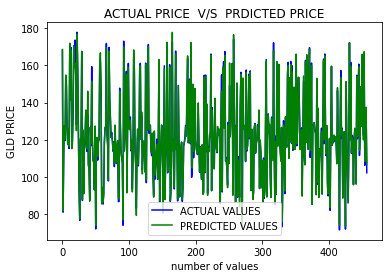

In [29]:
plt.plot(Y_test,color='blue',label='ACTUAL VALUES')
plt.plot(test_data_pred,color='green',label='PREDICTED VALUES')
plt.title('ACTUAL PRICE  V/S  PRDICTED PRICE')
plt.xlabel('number of values')
plt.ylabel('GLD PRICE')
plt.legend()
plt.show()